### Regression model

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64
alpha=0.05, l1_ratio=0.0, R^2=0.5504427457117427
alpha=0.05, l1_ratio=0.1, R^2=0.557074093470477
alpha=0.05, l1_ratio=0.2, R^2=0.5636612968899646
alpha=0.05, l1_ratio=0.3, R^2=0.5701285366884397
alpha=0.05, l1_ratio=0.4, R^2=0.5763663485334786
alpha=0.05, l1_ratio=0.5, R^2=0.5822875796356015
alpha=0.1, l1_ratio=0.0, R^2=0.48798728493273336
alpha=0.1, l1_ratio=0.1, R^2=0.49943359806961707
alpha=0.1, l1_ratio=0.2, R^2=0.5113563221023691
alpha=0.1, l1_ratio=0.3, R^2=0.523834594913295
alpha=0.1, l1_ratio=0.4, R^2=0.5367867936466372
alpha=0.1, l1_ratio=0.5, R^2=0.5500367872217011
alpha=0.25, l1_ratio=0.0, R^2=0.3675153674475301
alpha=0.25, l1_ratio=0.1, R^2=0.38204938012693557
alpha=0.25, l1_ratio=0.2, R^2=0.39825298798406916
alpha=0.25, l1_ratio=0.3, R^2=0.41642563294224366
alpha=0.25, l1_ratio=0.4, R^2=0.

c:\Users\ynaveed\Documents\BINF-5507-materials\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.386e+06, tolerance: 8.662e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\ynaveed\Documents\BINF-5507-materials\.pixi\envs\default\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.712e+06, tolerance: 8.662e+02 Linear regression models with null weight for the l1 regularization term

alpha=0.5, l1_ratio=0.0, R^2=0.27349959218980335
alpha=0.5, l1_ratio=0.1, R^2=0.28648224714691195
alpha=0.5, l1_ratio=0.2, R^2=0.3014400988801905
alpha=0.5, l1_ratio=0.3, R^2=0.31889564514842406
alpha=0.5, l1_ratio=0.4, R^2=0.33957532599554485
alpha=0.5, l1_ratio=0.5, R^2=0.36451589545368046
Best R^2: 0.5823 at alpha=0.05, l1_ratio=0.5


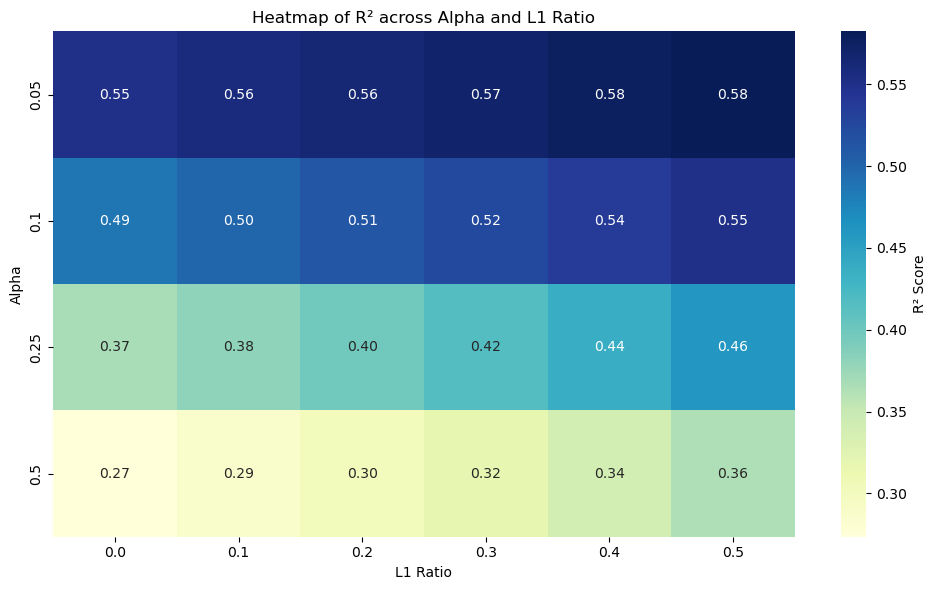

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score 

# import data
Data = pd.read_csv('../Data/heart_disease_uci(1).csv')

# Remove rows where target 'chol' is NaN
Data = Data[~Data['chol'].isna()]

X = Data.drop('chol', axis=1)
y = Data['chol']

print(Data['chol'].describe())
# Remove rows where 'chol' is less than or equal to 0
Data = Data[Data['chol'] > 0]

# convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True)  
# handle missing values
X.fillna(X.mean(), inplace=True)    

    

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define parameter ranges
l1_ratio_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
alpha_values = [0.05, 0.1, 0.25, 0.5]


# train and evalute ElasticNet for each combination of parameters
# Loop over all combinations
for i, alpha in enumerate(alpha_values):
	for j, l1_ratio in enumerate(l1_ratio_values):
		# Create an ElasticNet model with specific alpha and l1_ratio
		Elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
		Elastic_net.fit(X_train, y_train)

		# Predict on the test set
		y_pred = Elastic_net.predict(X_test)

		# Evaluate the model
		r2 = r2_score(y_test, y_pred)
		r2_matrix[i, j] = r2  # Store R^2 in the matrix

		# print for each combination
		print(f"alpha={alpha}, l1_ratio={l1_ratio}, R^2={r2}")

# print the best parameters
best_idx = np.unravel_index(np.argmax(r2_matrix), r2_matrix.shape)
best_alpha = alpha_values[best_idx[0]]
best_l1_ratio = l1_ratio_values[best_idx[1]]
print(f"Best R^2: {r2_matrix[best_idx]:.4f} at alpha={best_alpha}, l1_ratio={best_l1_ratio}")



# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(r2_matrix, 
            xticklabels=[round(l, 2) for l in l1_ratio_values], 
            yticklabels=[round(a, 2) for a in alpha_values], 
            cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'R² Score'})
plt.title('Heatmap of R² across Alpha and L1 Ratio')
plt.xlabel('L1 Ratio')
plt.ylabel('Alpha')
plt.tight_layout()
plt.show()



### Classification Model
# 1: logistic regession Model

Accuracy: 0.8369565217391305
F1 Score: 0.8584905660377359
AUROC: 0.8374311926605505
AUPRC: 0.8354229516576885


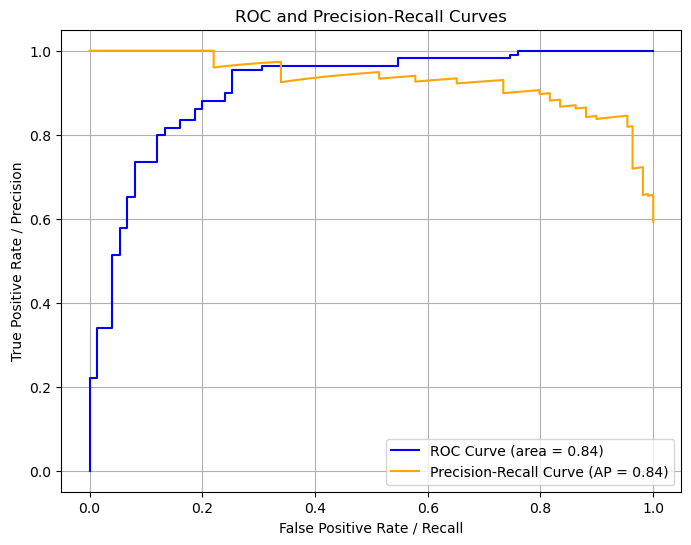

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LogisticRegression         
from sklearn.datasets import make_classification    
from sklearn.neighbors import KNeighborsClassifier          
from sklearn.metrics import accuracy_score,f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
minor_class = 0.5

# import data
Data = pd.read_csv('../Data/heart_disease_uci(1).csv')


#check columns
#print(Data.columns)

# 0 = no disease, 1 = disease (any value > 0 is considered disease)
Data['target'] = Data['num'].apply(lambda x: 1 if x > 0 else 0)
X= Data.drop(['num', 'target'], axis=1)
y= Data['num']

# convert categorical variables to numerical
X = pd.get_dummies(X, drop_first=True) 

# Handle missing values in X before splitting
X = X.fillna(X.mean())

# Use the binary target for classification, aligned with X
y_class = Data.loc[X.index, 'target']

# Split data into training and testing sets for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Logistic regression Train model
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
# Varying parameters (penalty and solver)
#model = LogisticRegression(penalty='l2',solver='saga', solver='saga', random_state=42)
#model = LogisticRegression(penalty='elasticnet',solver='saga', l1_ratio=0.5, random_state=42)
model.fit(X_train_cls, y_train_cls)

# Evaluate
y_pred_cls = model.predict(X_test_cls)

accuracy = accuracy_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls, average='binary')
auroc = roc_auc_score(y_test_cls, y_pred_cls)
auprc = average_precision_score(y_test_cls, y_pred_cls)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"AUROC: {auroc}")
print(f"AUPRC: {auprc}")

#plot ROC curve
fpr, tpr, _ = roc_curve(y_test_cls, model.predict_proba(X_test_cls)[:, 1])     
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(auroc), color='blue')  

#plot AUPRC curve
precision, recall, _ = precision_recall_curve(y_test_cls, model.predict_proba(X_test_cls)[:, 1])        
plt.plot(recall, precision, label='Precision-Recall Curve (AP = {:.2f})'.format(auprc), color='orange')
plt.xlabel('False Positive Rate / Recall')
plt.ylabel('True Positive Rate / Precision')
plt.title('ROC and Precision-Recall Curves')
plt.legend()
plt.grid()
plt.show() 



### 2: k-NN classifiers Model

k=1 - Accuracy: 0.7989130434782609, F1 Score: 0.8262910798122066, AUROC: 0.7970030581039755, AUPRC: 0.7972638151636955
k=5 - Accuracy: 0.8152173913043478, F1 Score: 0.8411214953271028, AUROC: 0.8972477064220183, AUPRC: 0.8884945626492349
k=10 - Accuracy: 0.8586956521739131, F1 Score: 0.8773584905660378, AUROC: 0.9201223241590214, AUPRC: 0.9127055633917975


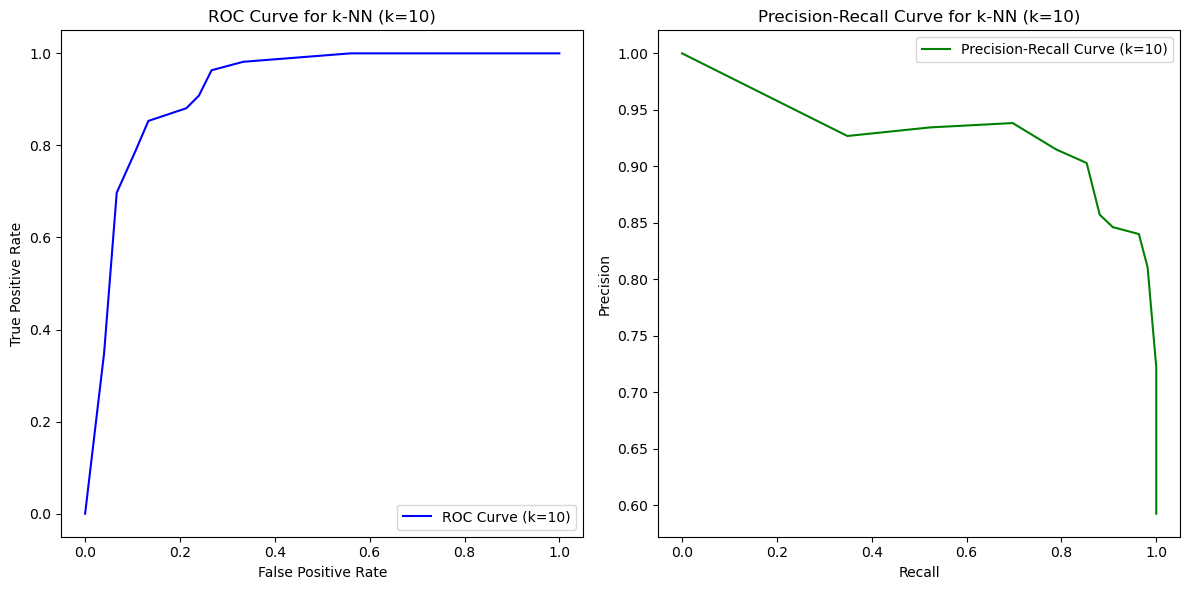

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score 
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cls)
X_test_scaled = scaler.transform(X_test_cls)

# different values for n_neighbors
neighbors_list = [1, 5, 10]

# Create a figure for plotting ROC and Precision-Recall curves for best configuration
plt.figure(figsize=(12, 6))

# Train a k-NN classifier
for k in neighbors_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train_cls)
    
    # Predict probabilities
    y_pred = knn.predict(X_test_scaled)  # For Accuracy & F1
    y_scores_knn = knn.predict_proba(X_test_scaled)[:, 1]  # For AUROC & AUPRC

    # Evaluate
    accuracy = accuracy_score(y_test_cls, y_pred)
    f1 = f1_score(y_test_cls, y_pred)
    auroc = roc_auc_score(y_test_cls, y_scores_knn)
    auprc = average_precision_score(y_test_cls, y_scores_knn)
    print(f"k={k} - Accuracy: {accuracy}, F1 Score: {f1}, AUROC: {auroc}, AUPRC: {auprc}")



# Only for k=10, plot ROC and Precision-Recall curves
    if k == 10:
        fpr, tpr, _ = roc_curve(y_test_cls, y_scores_knn)
        precision, recall, _ = precision_recall_curve(y_test_cls, y_scores_knn)

        # Plot ROC curve for k=10
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, label=f'ROC Curve (k={k})', color='blue')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve for k-NN (k=10)')
        plt.legend()

        # Plot Precision-Recall curve for k=10
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, label=f'Precision-Recall Curve (k={k})', color='green')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve for k-NN (k=10)')
        plt.legend()

# Show the plots for k=10
plt.tight_layout()
plt.show()



